In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib


In [101]:
class BVHparser:
    def __init__(self, filename):
        self.bvh = self.__readFile(filename)
        self.frame_time = self.__getFrameTime()

    def __readFile(self, filename):
        with open(filename, 'r') as f:
            return f.read()

    def __getFrameTime(self):
        for token in self.bvh.split('Frame Time:')[1].split():
            if token != '':
                return float(token)

    def __getMotion(self):
        motion = self.bvh.split('Frame Time:')[1]
        motion = motion.split("\n")
        return motion[1:]

    def getMotionDataframe(self):
        motion = [m.rstrip().split(' ') for m in self.__getMotion() if m != '']

        motion_df = pd.DataFrame(motion)
        motion_df.columns = [
            'root_Xposition', 'root_Yposition', 'root_Zposition', 'root_Xrotation', 'root_Yrotation', 'root_Zrotation',
            'torso_1_Xposition', 'torso_1_Yposition', 'torso_1_Zposition', 'torso_1_Xrotation', 'torso_1_Yrotation', 'torso_1_Zrotation',
            'torso_2_Xposition', 'torso_2_Yposition', 'torso_2_Zposition', 'torso_2_Xrotation', 'torso_2_Yrotation', 'torso_2_Zrotation',
            'torso_3_Xposition', 'torso_3_Yposition', 'torso_3_Zposition', 'torso_3_Xrotation', 'torso_3_Yrotation', 'torso_3_Zrotation',
            'torso_4_Xposition', 'torso_4_Yposition', 'torso_4_Zposition', 'torso_4_Xrotation', 'torso_4_Yrotation', 'torso_4_Zrotation',
            'torso_5_Xposition', 'torso_5_Yposition', 'torso_5_Zposition', 'torso_5_Xrotation', 'torso_5_Yrotation', 'torso_5_Zrotation',
            'torso_6_Xposition', 'torso_6_Yposition', 'torso_6_Zposition', 'torso_6_Xrotation', 'torso_6_Yrotation', 'torso_6_Zrotation',
            'torso_7_Xposition', 'torso_7_Yposition', 'torso_7_Zposition', 'torso_7_Xrotation', 'torso_7_Yrotation', 'torso_7_Zrotation',
            'neck_1_Xposition', 'neck_1_Yposition', 'neck_1_Zposition', 'neck_1_Xrotation', 'neck_1_Yrotation', 'neck_1_Zrotation',
            'neck_2_Xposition', 'neck_2_Yposition', 'neck_2_Zposition', 'neck_2_Xrotation', 'neck_2_Yrotation', 'neck_2_Zrotation',
            'head_Xposition', 'head_Yposition', 'head_Zposition', 'head_Xrotation', 'head_Yrotation', 'head_Zrotation',
            'l_shoulder_Xposition', 'l_shoulder_Yposition', 'l_shoulder_Zposition', 'l_shoulder_Xrotation', 'l_shoulder_Yrotation', 'l_shoulder_Zrotation',
            'l_up_arm_Xposition', 'l_up_arm_Yposition', 'l_up_arm_Zposition', 'l_up_arm_Xrotation', 'l_up_arm_Yrotation', 'l_up_arm_Zrotation',
            'l_low_arm_Xposition', 'l_low_arm_Yposition', 'l_low_arm_Zposition', 'l_low_arm_Xrotation', 'l_low_arm_Yrotation', 'l_low_arm_Zrotation',
            'l_hand_Xposition', 'l_hand_Yposition', 'l_hand_Zposition', 'l_hand_Xrotation', 'l_hand_Yrotation', 'l_hand_Zrotation',
            'r_shoulder_Xposition', 'r_shoulder_Yposition', 'r_shoulder_Zposition', 'r_shoulder_Xrotation', 'r_shoulder_Yrotation', 'r_shoulder_Zrotation',
            'r_up_arm_Xposition', 'r_up_arm_Yposition', 'r_up_arm_Zposition', 'r_up_arm_Xrotation', 'r_up_arm_Yrotation', 'r_up_arm_Zrotation',
            'r_low_arm_Xposition', 'r_low_arm_Yposition', 'r_low_arm_Zposition', 'r_low_arm_Xrotation', 'r_low_arm_Yrotation', 'r_low_arm_Zrotation',
            'r_hand_Xposition', 'r_hand_Yposition', 'r_hand_Zposition', 'r_hand_Xrotation', 'r_hand_Yrotation', 'r_hand_Zrotation',
            'l_up_leg_Xposition', 'l_up_leg_Yposition', 'l_up_leg_Zposition', 'l_up_leg_Xrotation', 'l_up_leg_Yrotation', 'l_up_leg_Zrotation',
            'l_low_leg_Xposition', 'l_low_leg_Yposition', 'l_low_leg_Zposition', 'l_low_leg_Xrotation', 'l_low_leg_Yrotation', 'l_low_leg_Zrotation',
            'l_foot_Xposition', 'l_foot_Yposition', 'l_foot_Zposition', 'l_foot_Xrotation', 'l_foot_Yrotation', 'l_foot_Zrotation',
            'l_toes_Xposition', 'l_toes_Yposition', 'l_toes_Zposition', 'l_toes_Xrotation', 'l_toes_Yrotation', 'l_toes_Zrotation',
            'r_up_leg_Xposition', 'r_up_leg_Yposition', 'r_up_leg_Zposition', 'r_up_leg_Xrotation', 'r_up_leg_Yrotation', 'r_up_leg_Zrotation',
            'r_low_leg_Xposition', 'r_low_leg_Yposition', 'r_low_leg_Zposition', 'r_low_leg_Xrotation', 'r_low_leg_Yrotation', 'r_low_leg_Zrotation',
            'r_foot_Xposition', 'r_foot_Yposition', 'r_foot_Zposition', 'r_foot_Xrotation', 'r_foot_Yrotation', 'r_foot_Zrotation',
            'r_toes_Xposition', 'r_toes_Yposition', 'r_toes_Zposition', 'r_toes_Xrotation', 'r_toes_Yrotation', 'r_toes_Zrotation',
        ]
        time = np.arange(0, motion_df.shape[0]) * self.frame_time
        motion_df.insert(0, 'time', time)
        for column in motion_df.columns:
            motion_df[column] = pd.to_numeric(motion_df[column], errors='coerce')
        return motion_df


In [102]:
def plot(
    df,
    heads,
    title,
    xlabel,
    ylabel,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    xgap=0,
    ygap=0,
    grid=True,
    output_sampling_rate=False
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
        if xgap > 0:
            plt.xticks(np.arange(int(xlim[0]), int(xlim[1]), xgap))

    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])
        if ygap > 0:
            plt.yticks(np.arange(int(ylim[0]), int(ylim[1]), ygap))

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    # サンプリング周波数
    t = (df['time'].iloc[-1] - df['time'].iloc[0])
    sampling_rate = df.shape[0] / t
    del t

    if output_sampling_rate:
        print(f'サンプリング周波数: {sampling_rate} Hz')

    plt.legend()
    plt.show()


In [103]:
bvh = BVHparser('logs/mocopi-move.bvh')
motion_df = bvh.getMotionDataframe()


In [104]:
motion_df.to_csv('logs/mocopi-move.csv', index=False)

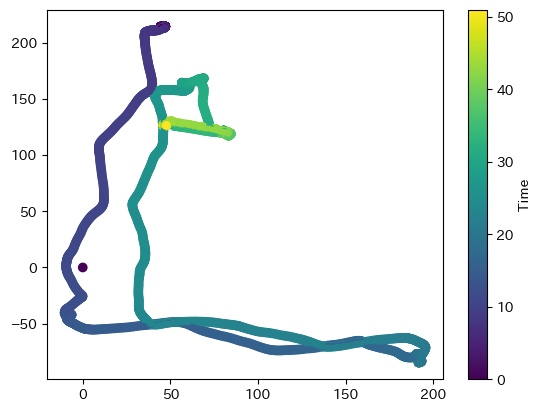

In [125]:
def plot_pos(df):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    fig, ax = plt.subplots()
    sc = ax.scatter(df['root_Xposition'], df['root_Zposition'], c=df['time'], cmap=cmap, norm=norm)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Time')

    for p in df[['time', 'root_Xposition', 'root_Yposition', 'root_Zposition']].itertuples():
        color = cmap(p[1] / df['time'].max())
        plt.plot(p[2], p[4], marker='.', color=color)
    plt.show()

plot_pos(motion_df)

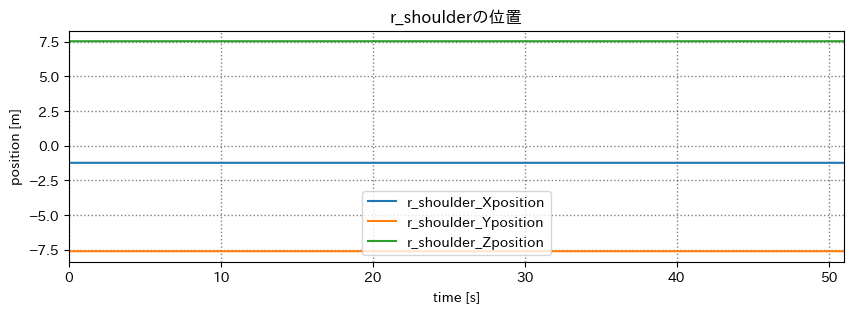

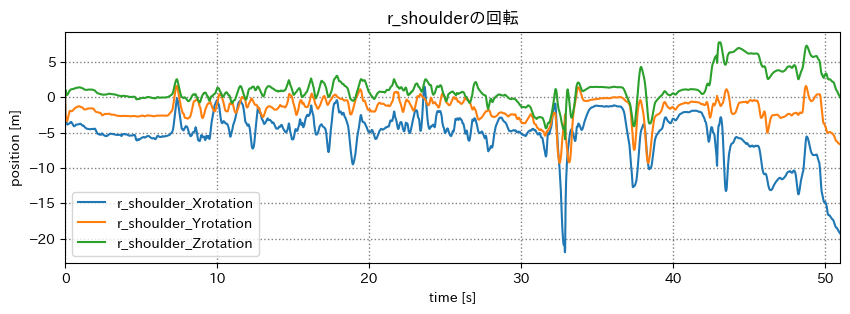

In [148]:
joint_name = 'r_shoulder'
xlim = (0, 51)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Xposition'],
        ['time', f'{joint_name}_Yposition'],
        ['time', f'{joint_name}_Zposition'],
    ],
    title=f'{joint_name}の位置',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Xrotation'],
        ['time', f'{joint_name}_Yrotation'],
        ['time', f'{joint_name}_Zrotation'],
    ],
    title=f'{joint_name}の回転',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ygap=ygap,
)


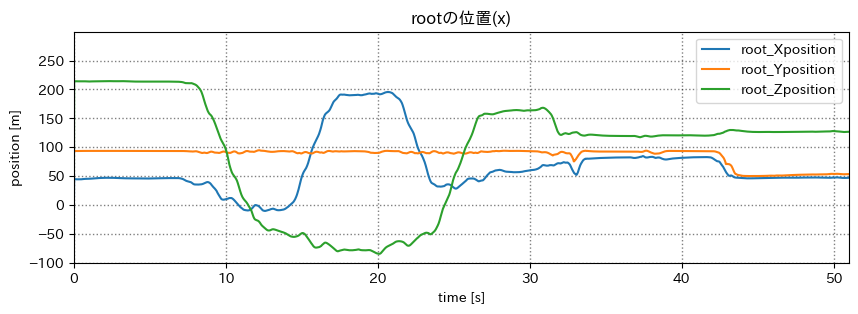

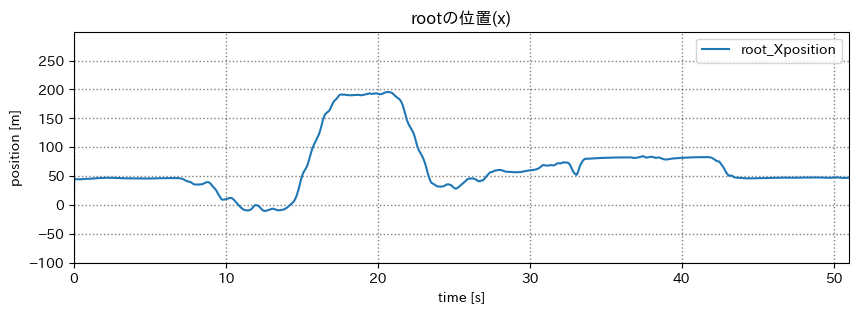

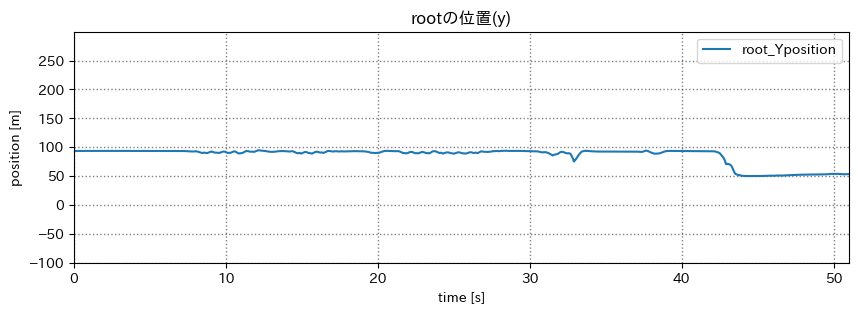

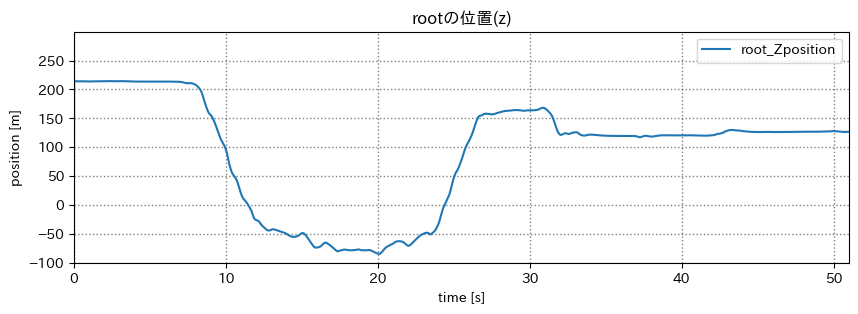

In [141]:
joint_name = 'root'
xlim = (0, 51)
ylim = (-100, 300)
ygap = 50

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Xposition'],
        ['time', f'{joint_name}_Yposition'],
        ['time', f'{joint_name}_Zposition'],
    ],
    title=f'{joint_name}の位置(x)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Xposition'],
    ],
    title=f'{joint_name}の位置(x)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Yposition'],
    ],
    title=f'{joint_name}の位置(y)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Zposition'],
    ],
    title=f'{joint_name}の位置(z)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)


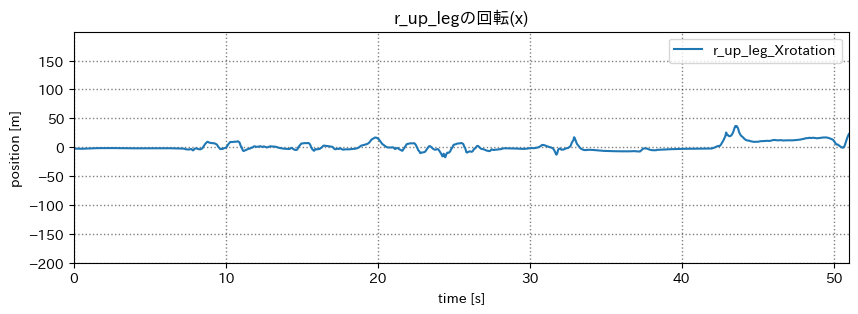

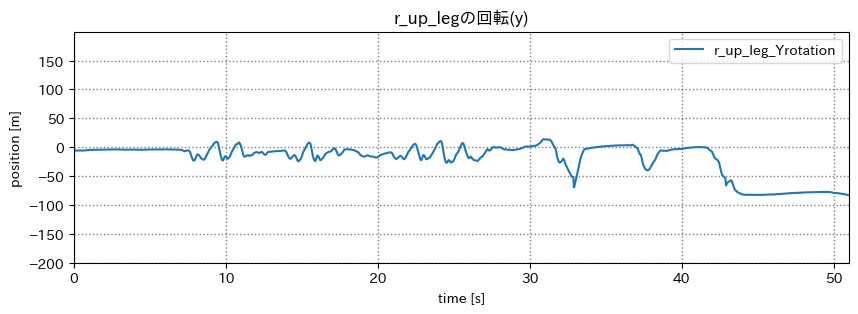

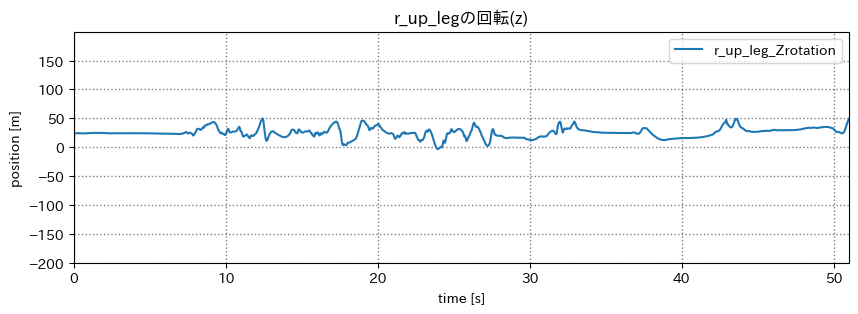

In [140]:
joint_name = 'r_up_leg'
xlim = (0, 51)
ylim = (-200, 200)
ygap = 50

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Xrotation'],
    ],
    title=f'{joint_name}の回転(x)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Yrotation'],
    ],
    title=f'{joint_name}の回転(y)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)

plot(
    motion_df,
    heads=[
        ['time', f'{joint_name}_Zrotation'],
    ],
    title=f'{joint_name}の回転(z)',
    xlabel='time [s]',
    ylabel='position [m]',
    xlim=xlim,
    ylim=ylim,
    ygap=ygap,
)